In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

ipl_data = pd.read_csv(r'C:\Users\hp_5C\OneDrive\Desktop\FTN\python\Projects\cricket\deliveries.csv')
ipl_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [2]:
ipl_data.shape

(179078, 21)

In [3]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
ipl_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

As we can see above, dataset has many missing values so it needs to be handled but in our case its match innegings data so this missing values make sense we will not apply data imputation method on it.

In [5]:
ipl_data.groupby('match_id')['total_runs'].sum()


match_id
1        379
2        371
3        367
4        327
5        299
        ... 
11347    280
11412    276
11413    341
11414    317
11415    309
Name: total_runs, Length: 756, dtype: int64

In [6]:
run_total_match = ipl_data.groupby(['match_id','inning','batting_team'])['total_runs'].sum()
run_total_match

match_id  inning  batting_team               
1         1       Sunrisers Hyderabad            207
          2       Royal Challengers Bangalore    172
2         1       Mumbai Indians                 184
          2       Rising Pune Supergiant         187
3         1       Gujarat Lions                  183
                                                ... 
11413     2       Delhi Capitals                 170
11414     1       Delhi Capitals                 155
          2       Chennai Super Kings            162
11415     1       Mumbai Indians                 152
          2       Chennai Super Kings            157
Name: total_runs, Length: 1528, dtype: int64

In [7]:
run_total_match = ipl_data.groupby(['match_id','inning','batting_team'])['total_runs'].sum()
winners = run_total_match.groupby('match_id').max()
winners


match_id
1        207
2        187
3        184
4        164
5        157
        ... 
11347    143
11412    140
11413    171
11414    162
11415    157
Name: total_runs, Length: 756, dtype: int64

* # winner teams

In [8]:
winner_team = run_total_match.groupby('match_id').idxmax()
winning_team = winner_team.apply(lambda x : x[2])
winning_team

match_id
1                Sunrisers Hyderabad
2             Rising Pune Supergiant
3              Kolkata Knight Riders
4                    Kings XI Punjab
5        Royal Challengers Bangalore
                    ...             
11347          Kolkata Knight Riders
11412                 Mumbai Indians
11413            Sunrisers Hyderabad
11414            Chennai Super Kings
11415            Chennai Super Kings
Name: total_runs, Length: 756, dtype: object

* # winning counts


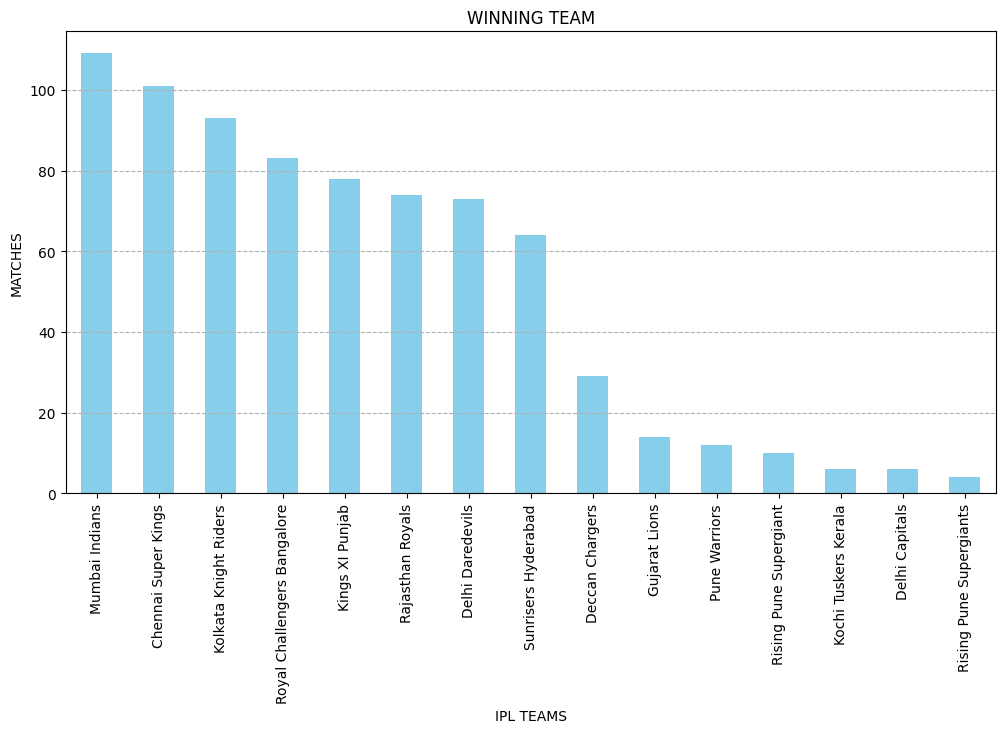

In [9]:
count_winning_team = winning_team.value_counts()
count_winning_team

fig, ax = plt.subplots(figsize = (12,6))
count_winning_team.plot(kind = 'bar',color = 'skyblue')
plt.xlabel('IPL TEAMS')
plt.ylabel('MATCHES')
plt.title('WINNING TEAM')
plt.grid(axis='y', linestyle='--')
plt.show()

* #  Top batsman in terms of runs


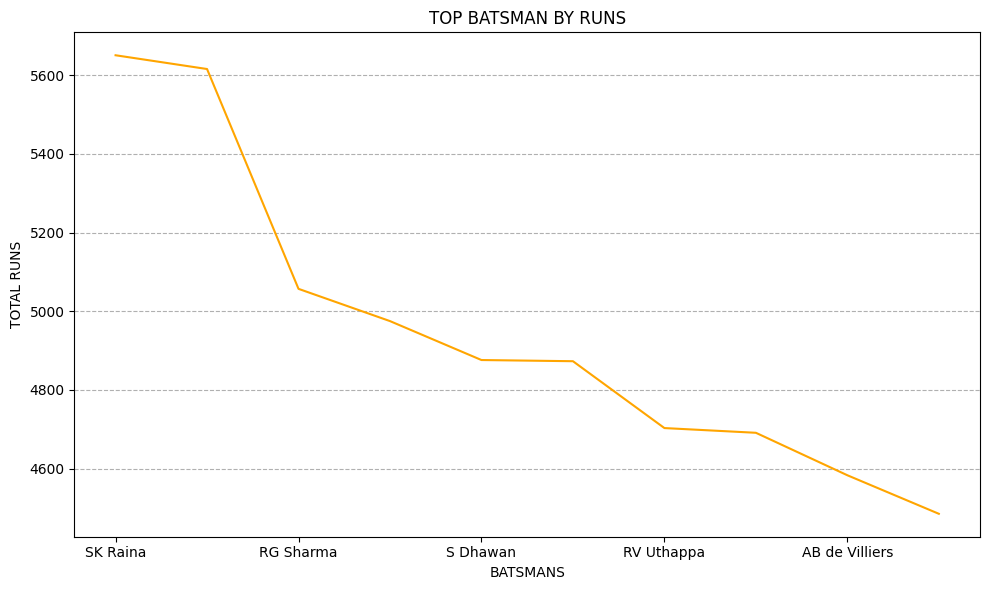

In [10]:
max_run = ipl_data.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).head(10)
max_run

plt.figure(figsize=(10,6))
max_run.plot(kind='line',color = 'orange')
plt.xlabel('BATSMANS')
plt.ylabel('TOTAL RUNS')
plt.title('TOP BATSMAN BY RUNS')
plt.grid(axis='y',linestyle = '--')
plt.tight_layout()
plt.show()

orange cap holder :- SK Raina

* # Most successful bowlers in terms of wickets taken

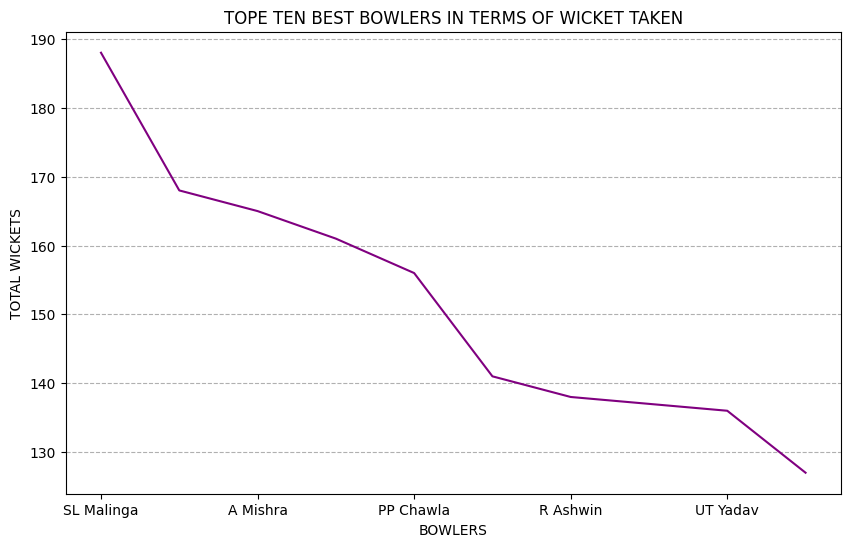

In [11]:
wicket_taker = ipl_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
wicket_taker

plt.figure(figsize=(10,6))
wicket_taker.plot(kind='line',color = 'purple')
plt.xlabel('BOWLERS')
plt.ylabel('TOTAL WICKETS')
plt.title('TOPE TEN BEST BOWLERS IN TERMS OF WICKET TAKEN')
plt.grid(axis='y',linestyle = '--')
plt.show()

Purple cap holder :- SL Malinga

* # Top batsmen with highest strike rate

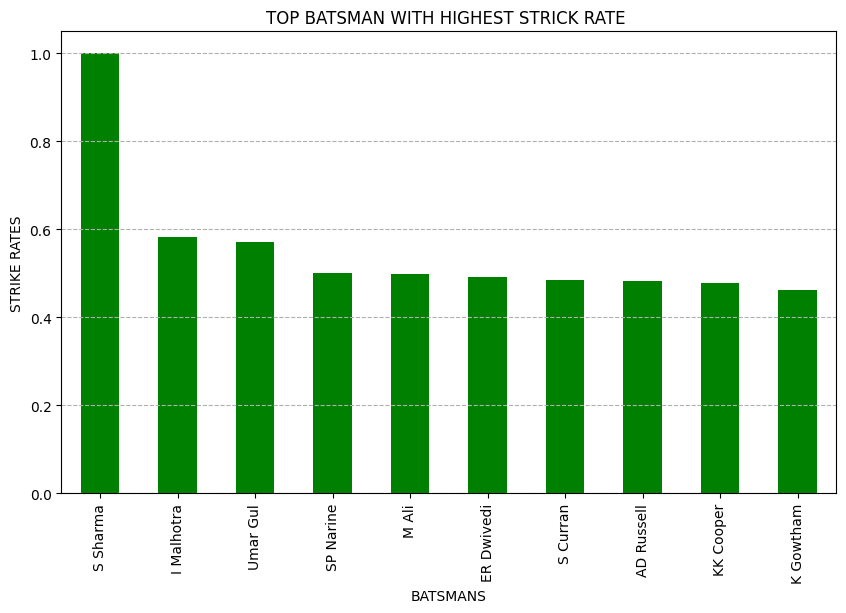

In [12]:
batsmen_strike_rate = ipl_data.groupby('batsman')['total_runs'].sum() / ipl_data.groupby('batsman')['ball'].sum()
batsmen_strike_rate = batsmen_strike_rate.sort_values(ascending=False).head(10)
batsmen_strike_rate

plt.figure(figsize=(10,6))
batsmen_strike_rate.plot(kind='bar',color = 'green')
plt.xlabel('BATSMANS')
plt.ylabel('STRIKE RATES')
plt.title('TOP BATSMAN WITH HIGHEST STRICK RATE ')
plt.grid(axis='y',linestyle = '--')
plt.show()

* # Extras conceded by each team

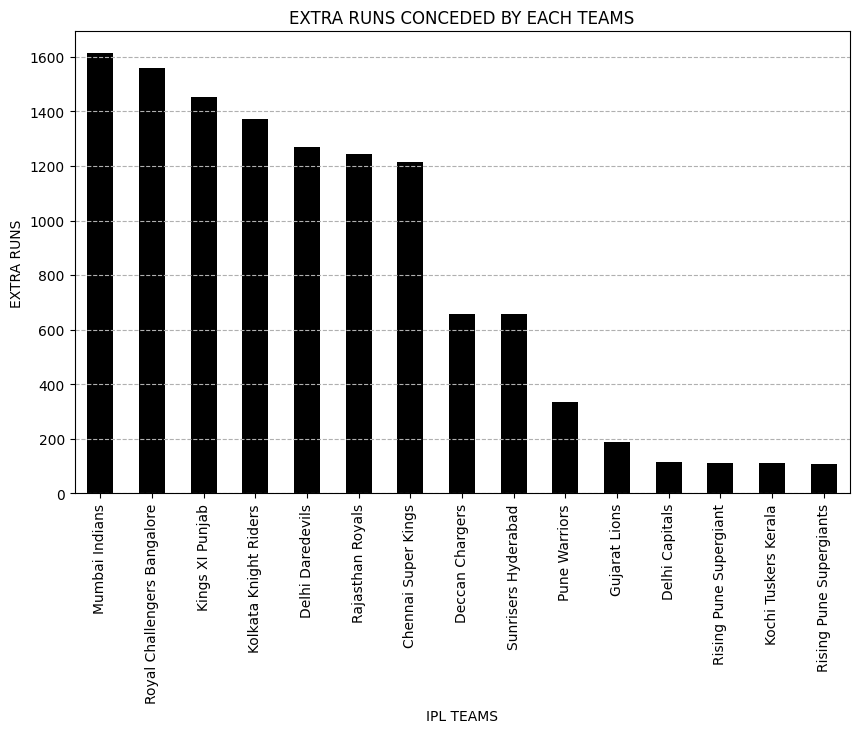

In [13]:
extras_conceded = ipl_data.groupby('bowling_team')['extra_runs'].sum().sort_values(ascending=False)
extras_conceded

plt.figure(figsize=(10,6))
extras_conceded.plot(kind='bar',color = 'black')
plt.xlabel('IPL TEAMS')
plt.ylabel('EXTRA RUNS')
plt.title('EXTRA RUNS CONCEDED BY EACH TEAMS')
plt.grid(axis='y',linestyle = '--')
plt.show()

* # Highest partnerships by runs

In [14]:
partnerships = ipl_data.groupby(['match_id', 'batsman', 'non_striker'])['total_runs'].sum().reset_index()
partnerships = partnerships.sort_values(by='total_runs',ascending=False).head(10)
partnerships

,match_id,batsman,non_striker,total_runs
14028,562,AB de Villiers,V Kohli,138
15400,620,AB de Villiers,V Kohli,132
10324,411,CH Gayle,TM Dilshan,130
9300,372,CH Gayle,V Kohli,128
7447,296,AC Gilchrist,SE Marsh,126
8328,331,DA Warner,NV Ojha,119
1807,72,AC Gilchrist,VVS Laxman,116
17601,11147,J Bairstow,DA Warner,116
9091,363,RG Sharma,HH Gibbs,113
891,36,DA Warner,S Dhawan,105


In [15]:
ars = plt.bar(ipl_data['batsman'] + ' - ' + ipl_data['non_striker'].astype(str), ipl_data['total_runs'], 
               )

plt.yticks(range(0, int(ipl_data['total_runs'].max()) + 1, 1))

plt.title('Most Successful Overs (by Wickets Taken)')
plt.xlabel('Bowler - Over')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* # Dismissal types by batsman

In [121]:
dismissal_types_batsman = ipl_data.groupby(['batsman', 'dismissal_kind'])['player_dismissed'].count().reset_index()
dismissal_types_batsman.pivot(index='batsman', columns='dismissal_kind', values='player_dismissed')

dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
batsman,,,,,,,,,
A Ashish Reddy,5.0,8.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
A Chandila,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
A Chopra,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0
A Choudhary,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
A Flintoff,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
YV Takawale,2.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Yashpal Singh,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Younis Khan,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* # Powerplay scores

<Axes: xlabel='batting_team'>

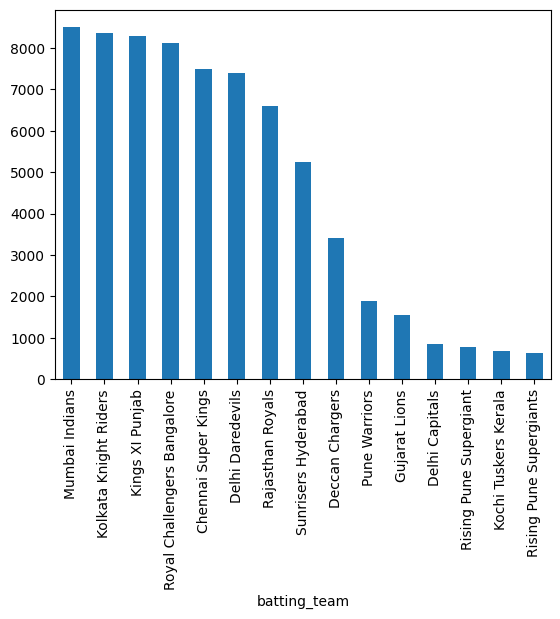

In [122]:

powerplay_scores = ipl_data[ipl_data['over'] <= 6].groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
powerplay_scores.plot(kind='bar')


* # Top bowlers in terms of economy rate

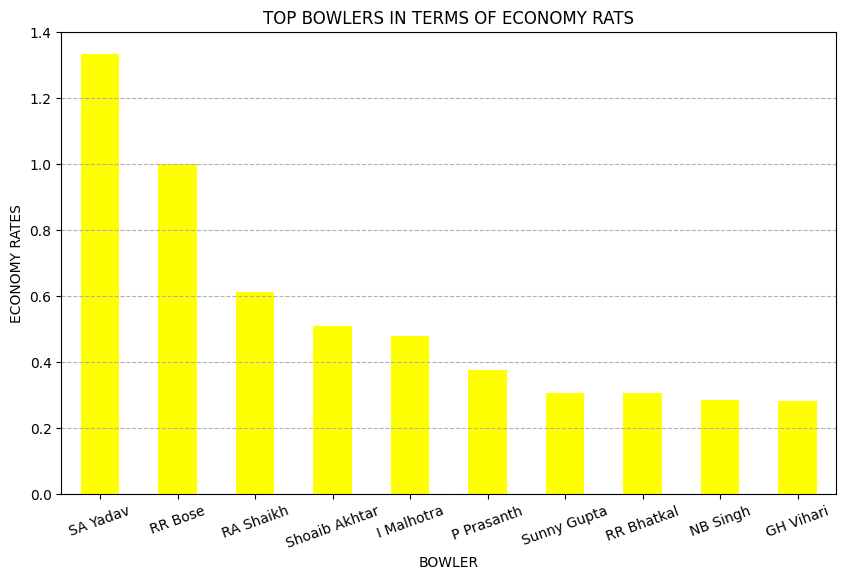

In [123]:
bowlers_economy = ipl_data.groupby('bowler')['total_runs'].sum() / ipl_data.groupby('bowler')['over'].sum()
bowlers_economy = bowlers_economy.sort_values(ascending=False).head(10)
bowlers_economy

plt.figure(figsize=(10,6))
bowlers_economy.plot(kind='bar',color = 'yellow')
plt.xlabel('BOWLER')
plt.ylabel('ECONOMY RATES')
plt.xticks(rotation=20)
plt.title('TOP BOWLERS IN TERMS OF ECONOMY RATS')
plt.grid(axis='y',linestyle = '--')
plt.show()


* # Top fielders in terms of catches taken

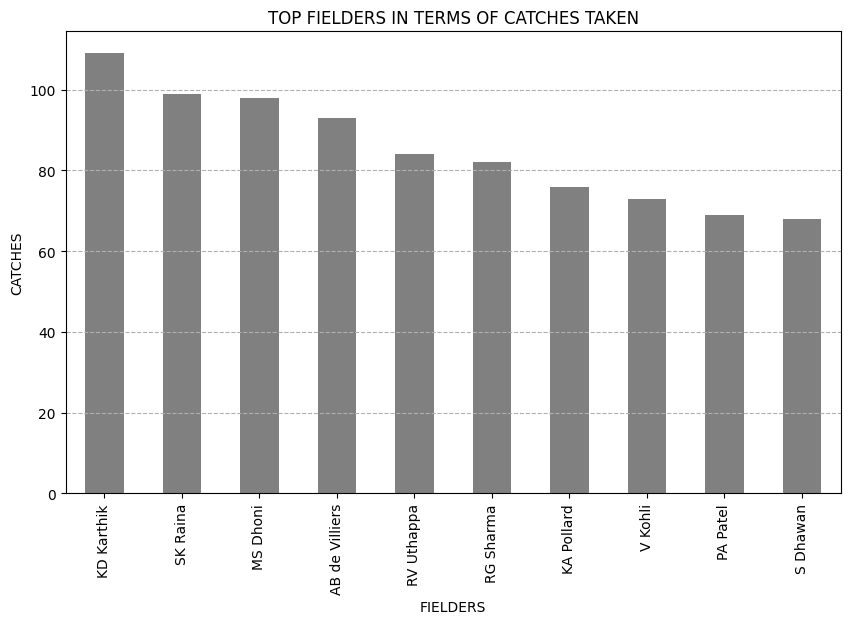

In [124]:
catches = ipl_data[ipl_data['dismissal_kind'] == 'caught'].groupby('fielder')['fielder'].count()
catches = catches.sort_values(ascending=False).head(10)
catches

plt.figure(figsize=(10,6))
catches.plot(kind='bar',color = 'gray')
plt.xlabel('FIELDERS')
plt.ylabel('CATCHES')
plt.title('TOP FIELDERS IN TERMS OF CATCHES TAKEN')
plt.grid(axis='y',linestyle = '--')
plt.show()


 # ==> IPL MATCHES DATASET

In [125]:
matches = pd.read_csv(r'C:\Users\hp_5C\OneDrive\Desktop\FTN\python\Projects\cricket\matches.csv')
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [126]:
matches.shape

(756, 18)

In [127]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [128]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

As we can see above, dataset has many missing values so it needs to be handled but in our case its match innegings data so this missing values make sense we will not apply data imputation method on it.

* # TEAMS TOSS DECISIONS

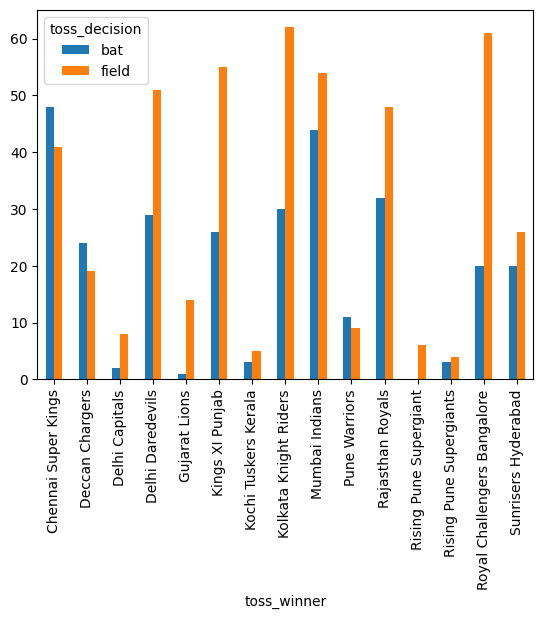

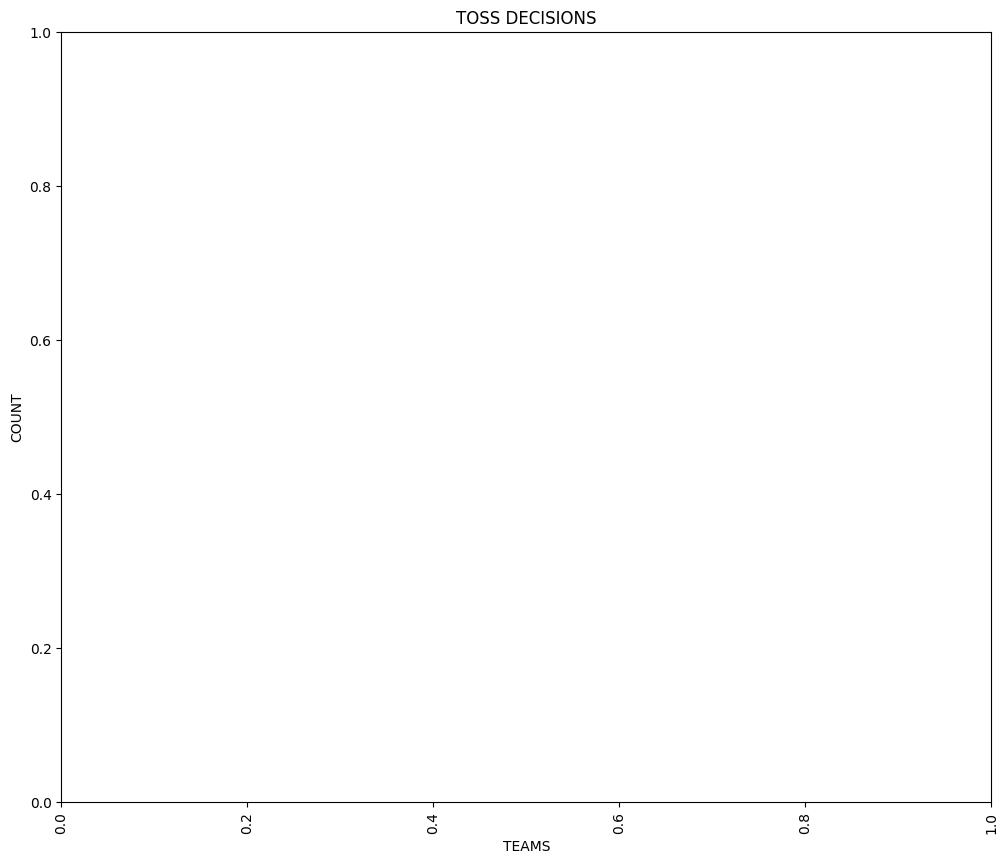

In [136]:
toss_decision = matches.pivot_table(columns='toss_decision',index='toss_winner',aggfunc='size', fill_value=0)
toss_decision

toss_decision.plot(kind='bar')
plt.figure(figsize=(12,10))
plt.title('TOSS DECISIONS')
plt.xticks(rotation=90)
plt.xlabel('TEAMS')
plt.ylabel('COUNT')
plt.show()

* # win by max runs margin

In [130]:
wins_by_run = matches.groupby('winner')['win_by_runs'].max().sort_values(ascending=False)
wins_by_run

winner
Mumbai Indians                 146
Royal Challengers Bangalore    144
Kolkata Knight Riders          140
Sunrisers Hyderabad            118
Kings XI Punjab                111
Rajasthan Royals               105
Delhi Daredevils                97
Chennai Super Kings             97
Deccan Chargers                 82
Rising Pune Supergiant          61
Delhi Capitals                  39
Pune Warriors                   38
Rising Pune Supergiants         34
Kochi Tuskers Kerala            17
Gujarat Lions                    1
Name: win_by_runs, dtype: int64

* # win by wickets

In [131]:
win_wickets = matches.groupby('winner')['win_by_wickets'].max().sort_values(ascending=False)
win_wickets

winner
Chennai Super Kings            10
Deccan Chargers                10
Delhi Daredevils               10
Kings XI Punjab                10
Rajasthan Royals               10
Mumbai Indians                 10
Kolkata Knight Riders          10
Royal Challengers Bangalore    10
Sunrisers Hyderabad            10
Rising Pune Supergiant          9
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Delhi Capitals                  7
Gujarat Lions                   7
Pune Warriors                   7
Name: win_by_wickets, dtype: int64

* # Top player of the match

In [132]:
top_player_of_match = matches.groupby(['player_of_match','Season'])['player_of_match'].count()
top_player_of_match = top_player_of_match.sort_values(ascending=False).head(10)
top_player_of_match

player_of_match  Season  
CH Gayle         IPL-2011    6
                 IPL-2012    5
V Kohli          IPL-2016    5
MEK Hussey       IPL-2013    5
SE Marsh         IPL-2008    5
AD Russell       IPL-2019    4
AB de Villiers   IPL-2016    4
SR Watson        IPL-2008    4
RG Sharma        IPL-2016    4
DA Warner        IPL-2015    4
Name: player_of_match, dtype: int64